# Mathematics for Machine Learning

## Linear Algebra

In [ ]:
import numpy as np
import scipy as sp

### Rank of a Matrix
let $A_{m\times n}$ be a matrix then the maximum number of its linearly independent columns (or rows )is called the rank of the matrix. The rank of the matrix cannot exceed the number of its rows or columns.
$$\rho(A)<= max(m,n)$$

#### Find the rank of the following matrix
$A = \begin{bmatrix}
2 & 4 & 6 \\
4 & 8 & 12
\end{bmatrix}$

In [ ]:
# define the given array
A = np.asarray([[2, 4, 6], [4, 8, 12]])

In [ ]:
def rank(A):
    return np.linalg.matrix_rank(A)

In [ ]:
print("The rank of the given matrix is: ", rank(A))

The rank of the given matrix is:  1


### Trace of a Matrix
The trace of a square matrix $A_{n\times n}$ is the sum of its diagonal entries.
$$trace(A) = \sum_{i=1}^{n} a_{ii}$$

#### Find the trace of the following matrix
$A = \begin{bmatrix}
1 & 2 & -1 \\
2 & 1 & 2\\
-1 & 2 & 1
\end{bmatrix}$

In [ ]:
# Define the given array
A = np.asarray([[1, 2, -1], [2, 1, 2], [-1, 2, 1]])

In [ ]:
def trace1(A):
    return np.sum(np.diagonal(A))

In [ ]:
def trace2(A):
    return np.trace(A)

In [ ]:
print("The trace of the matrix using numpy module is: ", trace1(A))
print("The trace of the matrix using numpy module is: ", trace2(A))

The trace of the matrix using numpy module is:  3
The trace of the matrix using numpy module is:  3


### Determinant of a Matrix
The determinant of a matrix $A_{n\times n}$ is the scalar value or number calculated using a square matrix i.e. the number of rows and columns are same.

#### Find the determinant of the following matrix:
A = $\begin{bmatrix}
2 & 0 & 0\\
2 & 3 & 0\\
3 & 8 & 4
\end{bmatrix}$

In [ ]:
# Define the given matrix
A = np.asarray([[2, 0, 0], [2, 3, 0], [3, 8, 4]])

In [ ]:
def det(A):
    if A.shape[0] != A.shape[1]:
        return "Given matrix is not a square matrix"
    else:
        return np.linalg.det(A)

In [ ]:
print("The determinant of the given matrix is: ", det(A))

The determinant of the given matrix is:  24.000000000000014


### Inverse of a Matrix
The inverse of square matrix $A_{n\times n}$ is $A_{n\times n}^{-1}$ iff
$$AA^{-1} = I_{n\times n}$$
where $I_{n \times n}$ is identity matrix

* The matrix should be square matrix.
* The matrix must be non singular i.e. $det(A) \neq 0$.
* The rank of matrix $n\times n$ should be $n$

#### Find the inverse of the following matrix:
A = $\begin{bmatrix}
4 & -3 & 5\\
1 & 0 & 3\\
-1 & 5 & 2
\end{bmatrix}$

In [ ]:
# Define the given matrix
A = np.asarray([[4, -3, 5], [1, 0, 3], [-1, 5, 2]])

In [ ]:
def inverse(A):
    if det(A) != 0:
        return np.linalg.inv(A)
    else:
        print("Inverse does not exist")

In [ ]:
print("The inverse of the given matrix is:\n", inverse(A))

The inverse of the given matrix is:
 [[ 0.75 -1.55  0.45]
 [ 0.25 -0.65  0.35]
 [-0.25  0.85 -0.15]]


In [ ]:
# to check
np.allclose(np.dot(A,_inverse(A)), np.eye(3))

True

### Eigen Value & Eigen Vectors
Consider a square matrix $A_{n \times n}$. If $X_{n \times 1}$ is the non-trivial column vector solution of the matrix equation $$AX = \lambda X$$
where $\lambda$ is a scalar, then $X_{n \times 1}$ is the eigenvector of matrix $A_{n \times n}$ and the corresponding value of $\lambda$ is the eigenvalue of matrix $A_{n \times n}$.m

#### Find the eigen values and eigen vector of the following matrix:

A = $\begin{bmatrix}
2 & -3 & 0\\
2 & -5 & 0\\
0 & 0 & 3
\end{bmatrix}$

In [ ]:
# Define the given matrix
A = np.array([[2, -3, 0], [2, -5, 0], [0, 0, 3]])

In [ ]:
def eig(A):
    return np.linalg.eig(A)

In [ ]:
eigval, eigvec = eig(A)
print("The eigen value of the given matrix is: ", eigval)
print("The eigen vector of the given matrix is:\n", eigvec)

The eigen value of the given matrix is:  [ 1. -4.  3.]
The eigen vector of the given matrix is:
 [[0.9486833  0.4472136  0.        ]
 [0.31622777 0.89442719 0.        ]
 [0.         0.         1.        ]]


### Projection and Orthogonalization

In machine learning, projection and orthogonalization are fundamental concepts, especially in feature space transformations and optimization problems. Projection involves mapping a vector onto another vector or subspace, usually to minimize the distance between the original vector and the subspace. Orthogonalization transforms a set of vectors into a set of orthogonal vectors that span the same subspace, which is vital for reducing feature redundancy and improving numerical stability in algorithms.

#### Task:
Implement a Python function project_and_orthogonalize that takes as input a set of vectors (as a 2D NumPy array) and performs the following tasks:

1. Orthogonalize the set of vectors using the Gram-Schmidt process.
2. Project a new vector onto the subspace spanned by the orthogonalized set.
3. Return the orthogonalized set of vectors and the projection of the new vector.

In [ ]:
def gram_schmidt(V):
    """Orthogonalize a set of vectors stored as the rows of matrix V."""
    V = V.astype(np.float64)
    U = np.zeros_like(V, dtype = np.float64)
    for i in range(len(V)):
        # Copy to avoid modifying the original vector
        vec = V[i, :].copy()
        for j in range(i):
            # Subtract the projection of vec on each previous u_j
            vec -= np.dot(U[j, :], V[i, :]) / np.dot(U[j, :], U[j, :]) * U[j, :]
        # Normalize the vector if it's not zero vector
        if np.linalg.norm(vec) > 0:
            U[i, :] = vec / np.linalg.norm(vec)
        else:
            U[i, :] = vec  # If vec is zero, keep it as zero (to handle degenerate cases)
    return U

In [ ]:
def project_onto_subspace(v, U):
    """Project vector v onto the subspace spanned by the rows of U."""
    U = U.astype(np.float64)
    projection = np.zeros_like(v, dtype = np.float64)
    for i in range(len(U)):
        projection += np.dot(v, U[i, :]) / np.dot(U[i, :], U[i, :]) * U[i, :]
    return projection

In [ ]:
def project_and_orthogonalize(V, v):
    """Orthogonalize a set of vectors and project another vector onto their span."""
    U = gram_schmidt(V)
    projection = project_onto_subspace(v, U)
    return U, projection

In [ ]:
# Example usage
V = np.array([[1, 1, 0], [1, 0, 1], [0, 1, 1]])  # Set of vectors
v = np.array([3, 3, 3])  # Vector to be projected

In [ ]:
orthogonalized_set, proj_v = project_and_orthogonalize(V, v)
print("Orthogonalized set:\n", orthogonalized_set)
print("Projection of v onto the subspace:", proj_v)

Orthogonalized set:
 [[ 0.70710678  0.70710678  0.        ]
 [ 0.40824829 -0.40824829  0.81649658]
 [-0.57735027  0.57735027  0.57735027]]
Projection of v onto the subspace: [3. 3. 3.]


### Principal Component Analysis (PCA)
Principal component analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

#### Steps of PCA
1. **Standardization:** The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.
Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.
$$ z = \frac{value - mean}{standard deviation}$$
Once the standardization is done, all the variables will be transformed to the same scale.

2. **Covariance Matrix Computation:** The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.
The covariance matrix is a $p \times p$ symmetric matrix (where $p$ is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables. For example, for a $3$-dimensional data set with $3$ variables $x$, $y$, and $z$, the covariance matrix is a $3×3$ matrix of this from:

$\begin{bmatrix}
Con(x,x) & Con(x,y) & Con(x,z)\\
Con(y,x) & Con(y,y) & Con(y,z)\\
Con(z,x) & Con(z,y) & Con(z,z)
\end{bmatrix}$

3. Compute the EigenVectors and EigenValues of the covariance matrix to identify the principal components

4. Create a feature vector to decide the Principal Components

5. Recast the data along the Principal Components Axes

#### Let us consider the same scenario that we have taken as an example previously. Let us assume the following features of dimensions as F1, F2, F3, and F4.

| $F_1$ | $F_2$ | $F_3$ | $F_4$ |
| ---- | --- | --- | --- |
| $1$ | $5$ | $3$ | $1$ |
| $4$ | $2$ | $6$ | $3$ |
| $1$ | $4$ | $3$ | $2$ |
| $4$ | $4$ | $1$ | $1$ |
| $5$ | $5$ | $2$ | $3$ |

In [ ]:
# Data

X = np.asarray([[1,5,3,1], [4,2,6,3], [1,4,3,2], [4,4,1,1], [5,5,2,3]])

In [ ]:
def PCA(X, num_components):

    #step-1
    X_std = (X - np.mean(X,axis=0))/np.std(X,axis=0, ddof = 1)

    #step-2
    conv_mat = np.cov(X_std, rowvar = False)

    #step-3
    eigen_values, eigen_vectors = np.linalg.eigh(conv_mat)

    #step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    #step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #step 6
    X_reduced = np.dot(eigenvector_subset.transpose(), X_std.transpose()).transpose()

    return X_reduced

In [ ]:
#Applying PCA

mat_reduced = PCA(X,2)

In [ ]:
print("The reduced matrix is:\n", mat_reduced)

The reduced matrix is:
 [[ 1.31476269 -0.9398916 ]
 [-2.50110671 -0.43742331]
 [ 0.31558805 -0.83495341]
 [ 0.973998    0.58816273]
 [-0.10324203  1.62410559]]


## Practice

### Calculate the following expression for given matrix.

A = $\begin{bmatrix}
1 & 0 & 2 \\
0 & 1 & 1 \\
0 & 0 & 2
\end{bmatrix}$

$$-A^3 + 4 A^2 + 5A - 2I$$
where, $I$ is the $3\times3$ identity matrix

In [ ]:
# Define the given matrix
A = np.array([[1, 0, 2], [0, 1, 1], [0, 0, 2]])

In [ ]:
def mpow(A,n):
    return np.linalg.matrix_power(A, n)


In [ ]:
evalute = -mpow(A,3)+4*mpow(A,2)+5*mpow(A,1)-2*mpow(A,0)

In [ ]:
print("The value of the given expression is:\n", evalute)

The value of the given expression is:
 [[ 6  0 20]
 [ 0  6 10]
 [ 0  0 16]]


### Find the Rank of the matrix without using NumPy module for numerical computation. Also write the time complexity.

$A = \begin{bmatrix}
2 & 4 & 6 \\
4 & 8 & 12
\end{bmatrix}$

In [ ]:
import numpy as np

def compute_rank(A):
    # Convert A to a float matrix to avoid integer division
    A = A.astype(float)

    m, n = A.shape
    rank = 0
    row = 0  # Start with the first row

    for col in range(n):
        # Find the first row with a nonzero entry in column col
        pivot_row = None
        for i in range(row, m):
            if A[i, col] != 0:
                pivot_row = i
                break

        # If no nonzero entry was found, move to the next column
        if pivot_row is None:
            continue

        # Swap the current row with the pivot row
        A[[row, pivot_row]] = A[[pivot_row, row]]

        # Make the pivot element 1 by dividing the whole row
        A[row] = A[row] / A[row, col]

        # Eliminate all other entries in this column
        for i in range(m):
            if i != row:
                A[i] = A[i] - A[i, col] * A[row]

        # Move to the next row and increase the rank
        row += 1
        rank += 1

        # If we've reached the last row, stop
        if row == m:
            break

    return rank

# Example usage
A = np.asarray([[2, 4, 6], [4, 8, 12]])
rank = compute_rank(A)
print("Rank of the matrix:", rank)


Rank of the matrix: 1


## Numerical Methods

### Linear System of Equation

#### Find the Inverse of the following matrix  
$A = \begin{bmatrix}
2 & 1 & 1 & -2\\
4 & 0 & 2 & 1\\
3 & 2 & 2 & 0\\
1 & 3 & 2 & -1
\end{bmatrix}$  
#### Hence, solve the system of equations $Ax=b$, where $b=[-10, 8, 7, -5]^T$

In [ ]:
# Define the matrix

A = np.array([[2, 1, 1, -2], [4, 0, 2, 1], [3, 2, 2, 0], [1, 3, 2, -1]])

In [ ]:
inv_A = inverse(A)
print("The inverse of the given matrix is:\n", inv_A)

The inverse of the given matrix is:
 [[ 0.15384615 -0.30769231  0.84615385 -0.61538462]
 [-0.15384615 -0.69230769  1.15384615 -0.38461538]
 [-0.07692308  1.15384615 -1.92307692  1.30769231]
 [-0.46153846 -0.07692308  0.46153846 -0.15384615]]


In [ ]:
# To calculate the value of x we multiply inv_A with b

b = np.array([-10, 8, 7, -5])
x = np.dot(inv_A,b)
print("The value of x is:", x)

The value of x is: [  5.   6. -10.   8.]


#### Solve the system of equations  
$\begin{bmatrix}
1 & 2 & 3\\
2 & 8 & 22\\
3 & 22 & 82
\end{bmatrix} \bar{x} = \begin{bmatrix}
5\\
6\\
-10\\
\end{bmatrix}$

In [ ]:
# Define the matrix A and b

A = np.array([[1, 2, 3],
              [2, 8, 22],
              [3, 22, 82]])

b = np.array([5, 6, -10])

In [ ]:
x = np.linalg.solve(A, b)

print("The value of x is:", x)

The value of x is: [ 2.  3. -1.]


#### Solve the system of equations  
$\begin{bmatrix}
1 & 0 & 0\\
2 & 2 & 0\\
3 & 8 & 3
\end{bmatrix} \bar{x} = \begin{bmatrix}
5\\
6\\
-10\\
\end{bmatrix}$

In [ ]:
A = np.array([[1, 0, 0],
              [2, 2, 0],
              [3, 8, 3]])
b = np.array([5, 6, -10])

In [ ]:
# Given matrix is lower triangular matrix

x = sp.linalg.solve_triangular(A, b, lower = True)
print(x)

[ 5. -2. -3.]


#### Solve the system of equations  
$\begin{bmatrix}
1 & -1 & 2 & 3\\
3 & 1 & -1 & 2\\
6 & 3 & 1 & -1\\
10 & 6 & 3 & 1
\end{bmatrix} \bar{x} = \begin{bmatrix}
1\\
2\\
2\\
5
\end{bmatrix}$

In [ ]:
# Define A and b

c = np.array([1, 3, 6, 10]) #first coloumn
r = np.array([1, -1, 2, 3]) #first row
A = sp.linalg.toeplitz(c, r)
b = np.array([1, 2, 2, 5])

In [ ]:
print(A)

[[ 1 -1  2  3]
 [ 3  1 -1  2]
 [ 6  3  1 -1]
 [10  6  3  1]]


In [ ]:
x = sp.linalg.solve_toeplitz((c,r),b)
print("The value of x is:", x)

The value of x is: [ 0.17741935  0.48387097 -0.0483871   0.46774194]


### Stabilty and Condition Number
It is important that numerical algorithms be stable and efficient. Efficiency is a property of an algorithm, but stability can be a property of the system itself.

##### Example
$\begin{bmatrix}
8 & 6 & 4 & 1\\
1 & 4 & 5 & 1\\
8 & 4 & 1 & 1\\
1 & 4 & 3 & 6
\end{bmatrix} \bar{x} = \begin{bmatrix}
19\\
11\\
14\\
14
\end{bmatrix}$

In [ ]:
A = np.array([[8,6,4,1],[1,4,5,1],[8,4,1,1],[1,4,3,6]])
b = np.array([19,11,14,14])

In [ ]:
print("The solution of given question is:", np.linalg.solve(A, b))

The solution of given question is: [1. 1. 1. 1.]


Now, we do *tiny* perturbation in the outcome vector $b$

In [ ]:
b_ = np.array([19.01,11.05,14.07,14.05])

In [ ]:
print("The solution after the tiny peturbation in b:", np.linalg.solve(A, b_))

The solution after the tiny peturbation in b: [-2.34   9.745 -4.85  -1.34 ]


Note that the *tiny* perturbations in the outcome vector $b$ cause large differences in the solution! When this happens, we say that the matrix $A$ *ill-conditioned*. This happens when a matrix is ‘close’ to being singular (i.e. non-invertible).

#### Condition number
A measure of this type of behavior is called the condition number. It is defined as:
$$cond(A) = ||A||.||A^{-1}||$$
In general, it is diffult to compute.

Fact:
$$cond(A) = \frac{\lambda_1}{\lambda_n}$$
where $\lambda_1$ is the maximum singular value of $A$ and $\lambda_n$ is the smallest. The higher the condition number, the more unstable the system. In general if there is a large discrepancy between minimal and maximal singular values, the condition number is large.

In [ ]:
U, s, V = np.linalg.svd(A)
print(s)
print("The condition number is:",max(s)/min(s))

[1.55457438e+01 6.90016811e+00 3.83634007e+00 4.86006099e-03]
The condition number is: 3198.6725811994825


## Practice

### Consider the system of equations:  
$2x-y=1$  
$-x+2y-z=0$  
$-y+2z-w=0$  
$-z+2w=1$  
Find the values of **x, y, z, w**

In [ ]:
c = np.array([2, -1, 0, 0]) #first coloumn
r = np.array([2, -1, 0, 0]) #first row
b = np.array([1, 0, 0, 1])

In [ ]:
x = sp.linalg.solve_toeplitz((c,r),b)
print("The value of x is:", x)

The value of x is: [1. 1. 1. 1.]


### Solve the system of equations  
$\begin{bmatrix}
1 & 2 & 3\\
0 & 2 & 8\\
0 & 0 & 3
\end{bmatrix} \bar{x} = \begin{bmatrix}
5\\
-2\\
-3\\
\end{bmatrix}$

In [ ]:
A = np.array([[1, 2, 3],
              [0, 2, 8],
              [0, 0, 3]])
b = np.array([5, -2, -3])

In [ ]:
x = sp.linalg.solve_triangular(A, b, lower = False)
print("The value of x is:", x)

The value of x is: [ 2.  3. -1.]


## Optimization

In [ ]:
from scipy.optimize import minimize

In [ ]:
# minimize?

You can read https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html to grasp the terms of results.

#### Minimize $f(x,y) = (x-1)^2 + (y-2.5)^2 $  
subject to:  
$x-2y+2 \geq 0$  
$-x-2y+6 \geq 0$  
$-x+2y+2 \geq 0$  
$x \geq 0$
$y \geq 0$

In [ ]:
# Define the given function
f = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2

In [ ]:
cons = ({'type':'ineq', 'fun':lambda x : x[0]-2*x[1]+2},
        {'type':'ineq', 'fun':lambda x : -x[0]-2*x[1]+6},
        {'type':'ineq', 'fun':lambda x : -x[0]+2*x[1]+2}
       )
bnds = ((0, None),(0, None))
result = minimize(f, (2,0), bounds = bnds, constraints = cons)
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3


In [ ]:
print("The minimum value of given function is at",result.x)

The minimum value of given function is at [1.4 1.7]


### Root

#### Find the root of following single-variable transcendental equation.  
1. $x^2+2 cos(x)=0$
2. $e^xln(x^2)-xcos(x)=0$

In [ ]:
from scipy.optimize import root

In [ ]:
# root?

In [ ]:
# Define both function

def f1(x):
    return x*2 + 2 * np.cos(x)

def f2(x):
    return np.exp(x)*np.log10(x**2)+x*np.cos(x)

In [ ]:
# Calculate root of function 1

result1 = root(f1, 0.3)
result2 = root(f2, 0.01)
print("The roots of the first function:\n", result1)
print("\nThe roots of the second function:\n", result2)

The roots of the first function:
  message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [-7.391e-01]
  method: hybr
    nfev: 10
    fjac: [[-1.000e+00]]
       r: [-3.347e+00]
     qtf: [-2.777e-12]

The roots of the second function:
  message: The solution converged.
 success: True
  status: 1
     fun: [-1.088e-14]
       x: [ 7.408e-01]
  method: hybr
    nfev: 11
    fjac: [[-1.000e+00]]
       r: [-2.151e+00]
     qtf: [ 5.814e-09]


## Practice

### Maximize $z=2x_1 - 2x_2 + 3x_3$  
subject to:  
$2x_1+3x_2-x_3 \leq 30$  
$3x_1-2x_2+x_3 \leq 24$  
$x_1-4x_2-6x_3 \geq 2$  
$x_1, x_2, x_3 \geq 0$

In [ ]:
f = lambda x: -2*x[0] + 2*x[1] - 3*x[2]
cons = ({'type':'ineq', 'fun':lambda x : -2*x[0]-3*x[1]+x[2]+30},
        {'type':'ineq', 'fun':lambda x : -3*x[0]+2*x[1]-x[2]+24},
        {'type':'ineq', 'fun':lambda x : x[0]-4*x[1]-6*x[2]-2}
       )
bnds = ((0, None),(0, None), (0,None))
result = minimize(f, (1,1,0), bounds = bnds, constraints = cons)
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -18.210526315789465
       x: [ 7.684e+00  4.985e-15  9.474e-01]
     nit: 3
     jac: [-2.000e+00  2.000e+00 -3.000e+00]
    nfev: 12
    njev: 3


### Find all roots of the following equation  
$x^2+10sin(x)=0$

In [ ]:
def f(x):
    return x**2+10*np.sin(x)
def g(x):
    return x-x

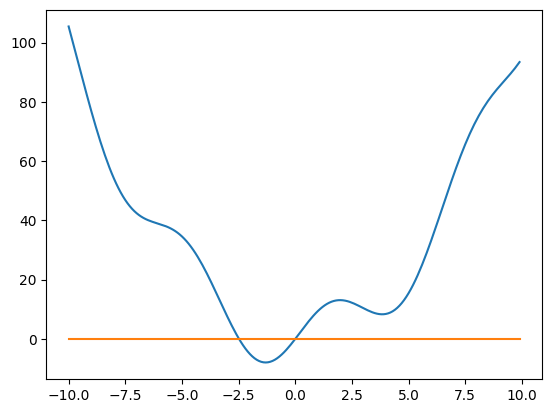

In [ ]:
#Visualizing all roots

import matplotlib.pyplot as plt

x = np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.plot(x,g(x))

plt.show()

In [ ]:
result1 = root(f,1)

result2 = root(f, -2)

In [ ]:
print("The all roots of the given function are:\n", result1.x, result2.x)

The all roots of the given function are:
 [0.] [-2.47948183]


## Calculus

### Gradient Descent

Gradient Descent is known as one of the most commonly used optimization algorithms to train machine learning models by means of minimizing errors between actual and expected results. Further, gradient descent is also used to train Neural Networks.

In mathematical terminology, Optimization algorithm refers to the task of minimizing/maximizing an objective function $f(x)$ parameterized by $x$. Similarly, in machine learning, optimization is the task of minimizing the cost function parameterized by the model's parameters. The main objective of gradient descent is to minimize the convex function using iteration of parameter updates. Once these machine learning models are optimized, these models can be used as powerful tools for Artificial Intelligence and various computer science applications.

Update the value of $x_{new}$ & $y_{new}$ variable in order to find the local minima using-
$$x_{new} = x-lr*\frac{\partial}{\partial x} f(x,y)$$
$$y_{new} = y-lr*\frac{\partial}{\partial y} f(x,y)$$

#### Minimize the following function using gradient decent method:
 $$f(x,y) = x^2 + y^2$$

In [ ]:
# Define the given function

f = lambda x,y: x**2 + y**2

In [ ]:
# Define the darivative of given function

def gradf(x, y):
    return array([2*x,2*y])

In [ ]:
def grad_descent(f, gradf, init_t, lr, max_iter):
    EPS = 1e-5
    prev_t = init_t-10*EPS
    t = init_t.copy()
    iter = 0
    while norm(t - prev_t) > EPS and iter < max_iter:
        prev_t = t.copy()
        t -= lr*gradf(t[0], t[1])
        print("Iteration",iter,"\n(x,y) value is", t, "\nf(x,y) value is",f(t[0], t[1])) #Print iterations
        #print(iter, t, f(t[0], t[1]), gradf(t[0], t[1]))
        iter += 1
    return t, f(t[0], t[1])

In [ ]:
# Random initialization

import random
random.seed(1)
a = random.randint(-10,10)
b = random.randint(-10,10)
print("Randomly start the process from",(a,b))

Randomly start the process from (-6, 8)


In [ ]:
from numpy import *
from numpy.linalg import norm
grad_descent(f, gradf, array([-6.0, 8.0]), 0.01, 1000)

Iteration 0 
(x,y) value is [-5.88  7.84] 
f(x,y) value is 96.03999999999999
Iteration 1 
(x,y) value is [-5.7624  7.6832] 
f(x,y) value is 92.236816
Iteration 2 
(x,y) value is [-5.647152  7.529536] 
f(x,y) value is 88.58423808639999
Iteration 3 
(x,y) value is [-5.53420896  7.37894528] 
f(x,y) value is 85.07630225817854
Iteration 4 
(x,y) value is [-5.42352478  7.23136637] 
f(x,y) value is 81.70728068875468
Iteration 5 
(x,y) value is [-5.31505429  7.08673905] 
f(x,y) value is 78.47167237347999
Iteration 6 
(x,y) value is [-5.2087532   6.94500427] 
f(x,y) value is 75.3641941474902
Iteration 7 
(x,y) value is [-5.10457814  6.80610418] 
f(x,y) value is 72.37977205924958
Iteration 8 
(x,y) value is [-5.00248657  6.6699821 ] 
f(x,y) value is 69.5135330857033
Iteration 9 
(x,y) value is [-4.90243684  6.53658246] 
f(x,y) value is 66.76079717550945
Iteration 10 
(x,y) value is [-4.8043881   6.40585081] 
f(x,y) value is 64.11706960735927
Iteration 11 
(x,y) value is [-4.70830034  6.27773379]

(array([-0.00028932,  0.00038576]), 2.325190186891289e-07)

### Integration

#### Find the integration of the following
$$\int_{0}^{1/2} \int_{0}^{\sqrt{1-4y^2}} 16xy \:dx dy$$

In [ ]:
f = lambda x, y : 16*x*y

In [ ]:
from math import sqrt
lwr_x = lambda y : 0
upr_x = lambda y : sqrt(1-4*y**2)

In [ ]:
result, error = sp.integrate.dblquad(f, 0, 0.5, lwr_x, upr_x)
print("The integration of given function is:", result)
print(error)

The integration of given function is: 0.5
1.7092350012594845e-14


## Practice

### Find the volume of the region below $z = 4-xy$ and above the region in the $xy$ plane defined by $0 \leq x \leq 2$, $0 \leq y \leq 1$.

In [ ]:
f = lambda x,y,z : 1

In [ ]:
lwr_z = lambda x, y : 0
upr_z = lambda x, y : 4-x*y

In [ ]:
result, error = sp.integrate.tplquad(f, 0, 2, 0, 1, lwr_z, upr_z)
print("The integration of given function is:", result)
print(error)

The integration of given function is: 7.0
7.771561172376096e-14
